# Part I - Fordgobike-Tripdata Exploration
## by David G. AKPOVI

## Introduction
> The dataset I chose is called Fordgobike-Tripdata. This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Fordgobike-Tripdata is a bike-sharing system where people can borrow a bike to go where they want. They can be customer or subscriber. 






## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> I will explore my dataset with the codes below.


In [2]:
#This code is for loading the dataset 
fordgobike = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#This code is to see the shape of my dataset
print(fordgobike.shape)

(183412, 16)


We can see the initial structure of the dataset which has 183412 rows and 16 columns. 

In [4]:
#This code is to display the first five columns of our dataset for further exploration
fordgobike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


We can see the first 5 rows of our dataset and informations which are linked to them. 

In [313]:
# Here, I will describe fordgobike. To do that, I will use a function fdescrp. 

def fdescrp():
    for col in fordgobike:
        print(fordgobike[col].describe())

In [314]:
# In this cell, I will call my function. 

fdescrp()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64
count                       183412
unique                      183401
top       2019-02-25 08:52:07.5820
freq                             2
Name: start_time, dtype: object
count                       183412
unique                      183397
top       2019-02-11 08:03:22.6020
freq                             2
Name: end_time, dtype: object
count    183215.000000
mean        138.590427
std         111.778864
min           3.000000
25%          47.000000
50%         104.000000
75%         239.000000
max         398.000000
Name: start_station_id, dtype: float64
count                   183215
unique                     329
top       Market St at 10th St
freq                      3904
Name: start_station_name, dtype: object
count    183412.000000
mean         37.771223
std   

We can see the description of our dataset below.

In [5]:
#Let's show some other informations about this dataset
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

We can notice that some types are wrong like start_time, end_time, user_type, member_gender... I will change them after during the cleaning phase. 

In [6]:
#I am going to check if there are null values
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are some null values in our dataset. I will remove them during the cleaning phase.

In [7]:
#I am going to check if there are duplicate rows
fordgobike.duplicated().sum()

0

There is no duplicate rows in our dataset. 


## Cleaning Phase 
#### I will clean my dataset

>I will work on some cleaning things : delete the null values, change the types, delete some columns, add new column. 

> To start the cleaning, I will copy my dataset. 

In [156]:
#I will copy my dataset with this code
fordgobike_new = fordgobike.copy()

In [157]:
#In this code, I will delete the null values
fordgobike_new.dropna(inplace=True)

In [10]:
#I am going to check if the null values are deleted 
fordgobike_new.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

All the null values have been deleted. 

Now, I will change the types of start_time, end_time, user_type, member_gender and bike_share_for_all_trip. 

In [158]:
#This code is to change the type of start_time into datetime
fordgobike_new['start_time'] = pd.to_datetime(fordgobike_new['start_time'])

In [159]:
#This code is to change the type of end_time into datetime
fordgobike_new['end_time'] = pd.to_datetime(fordgobike_new['end_time'])

In [160]:
#This code is to change the type of user_type into category
fordgobike_new.user_type = fordgobike_new.user_type.astype('category')

In [161]:
#This code is to change the types of member_gender into category 
fordgobike_new.member_gender = fordgobike_new.member_gender.astype('category')

In [162]:
#This code is to change the types of bike_share_for_all_trip into category 
fordgobike_new.bike_share_for_all_trip = fordgobike_new.bike_share_for_all_trip.astype('category')

In [163]:
#I will check if the types have been changed
print(fordgobike_new.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object


We can see that the types have been sucessfully changed. 

Now, I will work on the columns. Delete some and add new one. 

In [164]:
#This code is for deleting some columns I judge useless for our work
fordgobike_new.drop(['start_station_latitude',
                     'start_station_longitude', 
                    'end_station_latitude',
                     'end_station_longitude'
                    ], axis=1, inplace=True)

To make my work more easier, I will add a column which contains directly the age of the users. It will help me for my visualization. 

In [165]:
#I Will make the calculation of the age based on the current year 2022

fordgobike_new['age'] = 2022 - fordgobike_new['member_birth_year']

Let's see in the code below if the age column has been added

In [166]:
fordgobike_new.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,38.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,48.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,63.0


We can see that the latitude and longitude columns have been dropped and the age column has been added. Let's see the structure of the dataset cleaned. 

In [167]:
#I want to check the type of the age column
print(fordgobike_new.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                               float64
dtype: object


We can see that the age column is in Float. I will change it into Int. 

In [168]:
#Code to change the age type
fordgobike_new.age = fordgobike_new.age.astype('int64')

In [169]:
#Let's check the types of the age column
print(fordgobike_new.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                                 int64
dtype: object


The age type has been succesffully changed. 

In [216]:
#This code is to describe numeric values of my dataset
fordgobike_new.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age,duration_min
count,174785.000000,174785.000000,174785.000000,174785.000000,174785.000000,174785.000000,174785.000000
mean,704.276013,139.013834,136.636616,4482.384409,1984.867454,37.132546,11.245988
std,1642.917766,111.648814,111.350110,1659.185051,9.896008,9.896008,27.383164
min,61.000000,3.000000,3.000000,11.000000,1933.000000,21.000000,1.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,30.000000,5.000000
50%,511.000000,104.000000,101.000000,4960.000000,1987.000000,35.000000,8.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,42.000000,13.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,89.000000,1409.000000


We can above that the minimum age is 21, the maximum is 144. We have an outliner there. We will work on the data to drop age above 90 years.

In [171]:
#Code to delete people whose age are more than 90 years
fordgobike_new.drop(fordgobike_new[(fordgobike_new.member_birth_year < 1932 )].index, inplace = True)

In [172]:
#Let's check if the code has worked
fordgobike_new.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age
count,174785.000000,174785.000000,174785.000000,174785.000000,174785.000000,174785.000000
mean,704.276013,139.013834,136.636616,4482.384409,1984.867454,37.132546
std,1642.917766,111.648814,111.350110,1659.185051,9.896008,9.896008
min,61.000000,3.000000,3.000000,11.000000,1933.000000,21.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,30.000000
50%,511.000000,104.000000,101.000000,4960.000000,1987.000000,35.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,42.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,89.000000


We can see now that the maximum age is 89 and the minimum is 21. 

In [173]:
#Code to see how many rows and columns we have in the dataset cleaned
print(fordgobike_new.shape)

(174785, 13)


We have now 174785 rows and 13 columns in our dataset. 

In [174]:
#Lets display the first rows of the dataset
fordgobike_new.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,63


In [175]:
#Code to describe the numerical variables of my dataset
fordgobike_new.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age
count,174785.000000,174785.000000,174785.000000,174785.000000,174785.000000,174785.000000
mean,704.276013,139.013834,136.636616,4482.384409,1984.867454,37.132546
std,1642.917766,111.648814,111.350110,1659.185051,9.896008,9.896008
min,61.000000,3.000000,3.000000,11.000000,1933.000000,21.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,30.000000
50%,511.000000,104.000000,101.000000,4960.000000,1987.000000,35.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,42.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,89.000000


### What is the structure of your dataset?

After I have done the wrangling of my dataset, I can see it has 174952 rows and 13 features : duration_sec,            start_time, end_time, start_station_id, start_station_name, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trips, age.

The numerical values of the dataset are : duration_sec, start_station_id, end_station_id, bike_id, member_birth_year, age. 
The nominal values are : start_station_name, end_station_name, user_type, member_gender, bike_share_for_all_trips. 


### What is/are the main feature(s) of interest in your dataset?

The main feature of my dataset is the duration of a bike trip and user_type. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support my investigation, I will need the duration_sec, end_station_name, user_type, start_time, start_time, end_time, start_station_name, member_gender, age. These features will help me to visualize and sort important informations from my dataset which can help to improve the service of bike sharing. 


## Univariate Exploration

> In this section, I will investigate distributions of individual variables.


### Exploration 1-What is the distribution for the bike trip duration ?

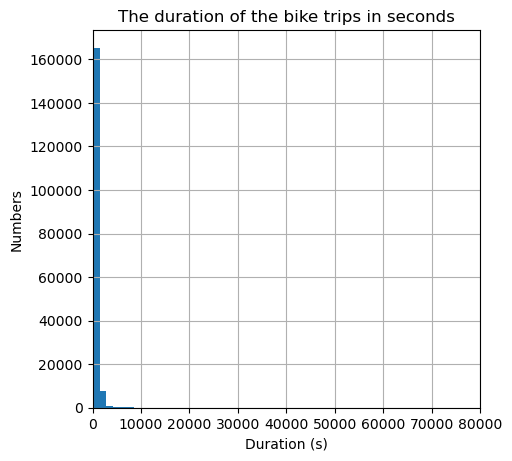

In [273]:
#This code is to visualize the distribution for duration of the bike trip in seconds 
plt.figure(figsize = (5,5), dpi = 100)

fordgobike_new['duration_sec'].hist(bins=60)
plt.xlim(0, 80000)
plt.xlabel('Duration (s)')
plt.ylabel('Numbers')
plt.title("The duration of the bike trips in seconds")

plt.show()

 **This visualization is very difficult to interpret. It is not very useful because the durations are in seconds. I will convert the duration in minutes to have a better view** 

In [177]:
#Code to change the duration in minutes
fordgobike_new['duration_min'] = fordgobike_new['duration_sec']/60

fordgobike_new.duration_min = fordgobike_new.duration_min.astype('int64')



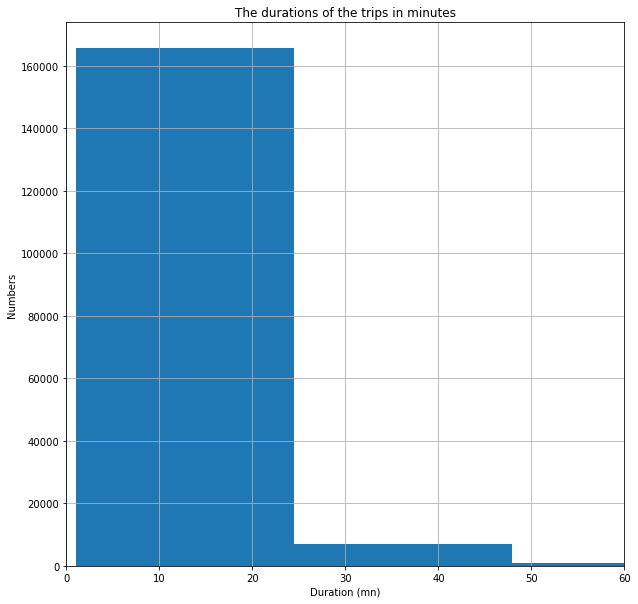

In [272]:
#Code to visualize the duration of the the bike trips in minutes
plt.figure(figsize = (10,10))

fordgobike_new['duration_min'].hist(bins=60)
plt.xlim(0, 60)
plt.xlabel('Duration (mn)')
plt.ylabel('Numbers')
plt.title("The durations of the trips in minutes")

plt.show()

**This visualization is more clear and more useful. We can see that the duration of most of the bike trips don't last more than 30 mn. Most of the bike trips durations are less an half an hour** 

### Exploration 2-What are the 5 prefered destinations for bike trips ?

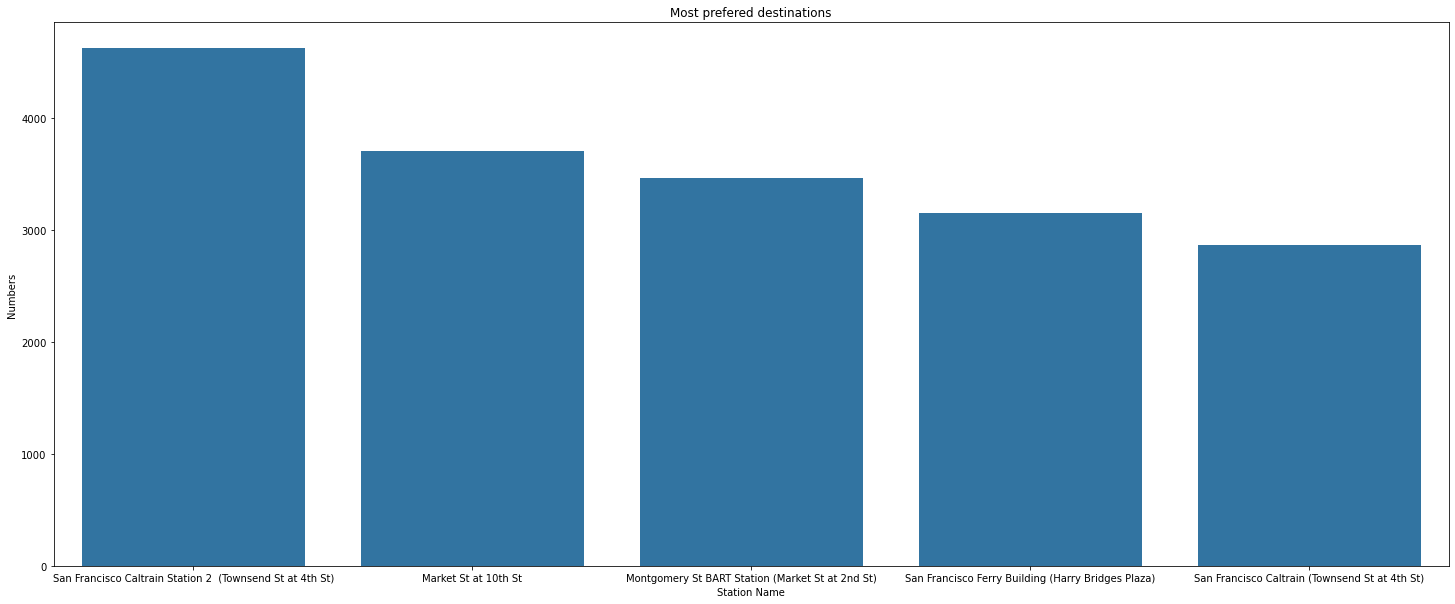

In [315]:
#The code to visualize the end_station_name distribution

base_color = sb.color_palette()[0]

order_dest = fordgobike_new['end_station_name'].value_counts().index[:5]

plt.figure(figsize=[25, 10])

sb.countplot(data = fordgobike_new, x='end_station_name', color=base_color, order=order_dest)

plt.title("Most prefered destinations")
plt.ylabel("Numbers")
plt.xlabel('Station Name');

**With this visualization, we can see that the most prefered destinations are San Francisco Caltrain Station 2, Market St, Montgomery St BART Station, San Franciscco Ferry Building** 

### Exploration 3- What are the most used departure stations ?

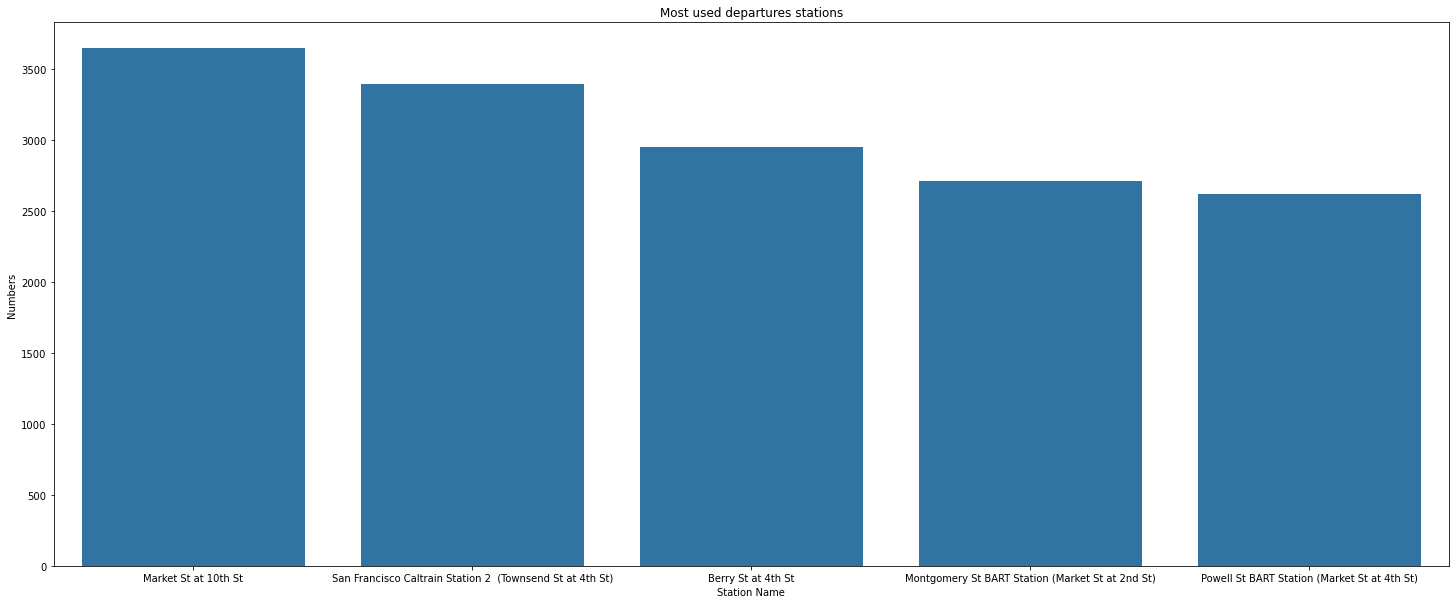

In [270]:
#The code to know the most used departure stations

base_color = sb.color_palette()[0]
order_dept = fordgobike_new['start_station_name'].value_counts().index[:5]

plt.figure(figsize=[25, 10])

sb.countplot(data = fordgobike_new, x='start_station_name', color=base_color, order=order_dept)

plt.title("Most used departures stations")
plt.ylabel("Numbers")
plt.xlabel('Station Name');

**We can see that the most used departures stations are Market St at 10th St, San Francisco Caltrain Station 2, Berry St, Montgomery St BART Station, Powell St BART Station**

### Exploration 4- What is the usage proportion of each user's type ?

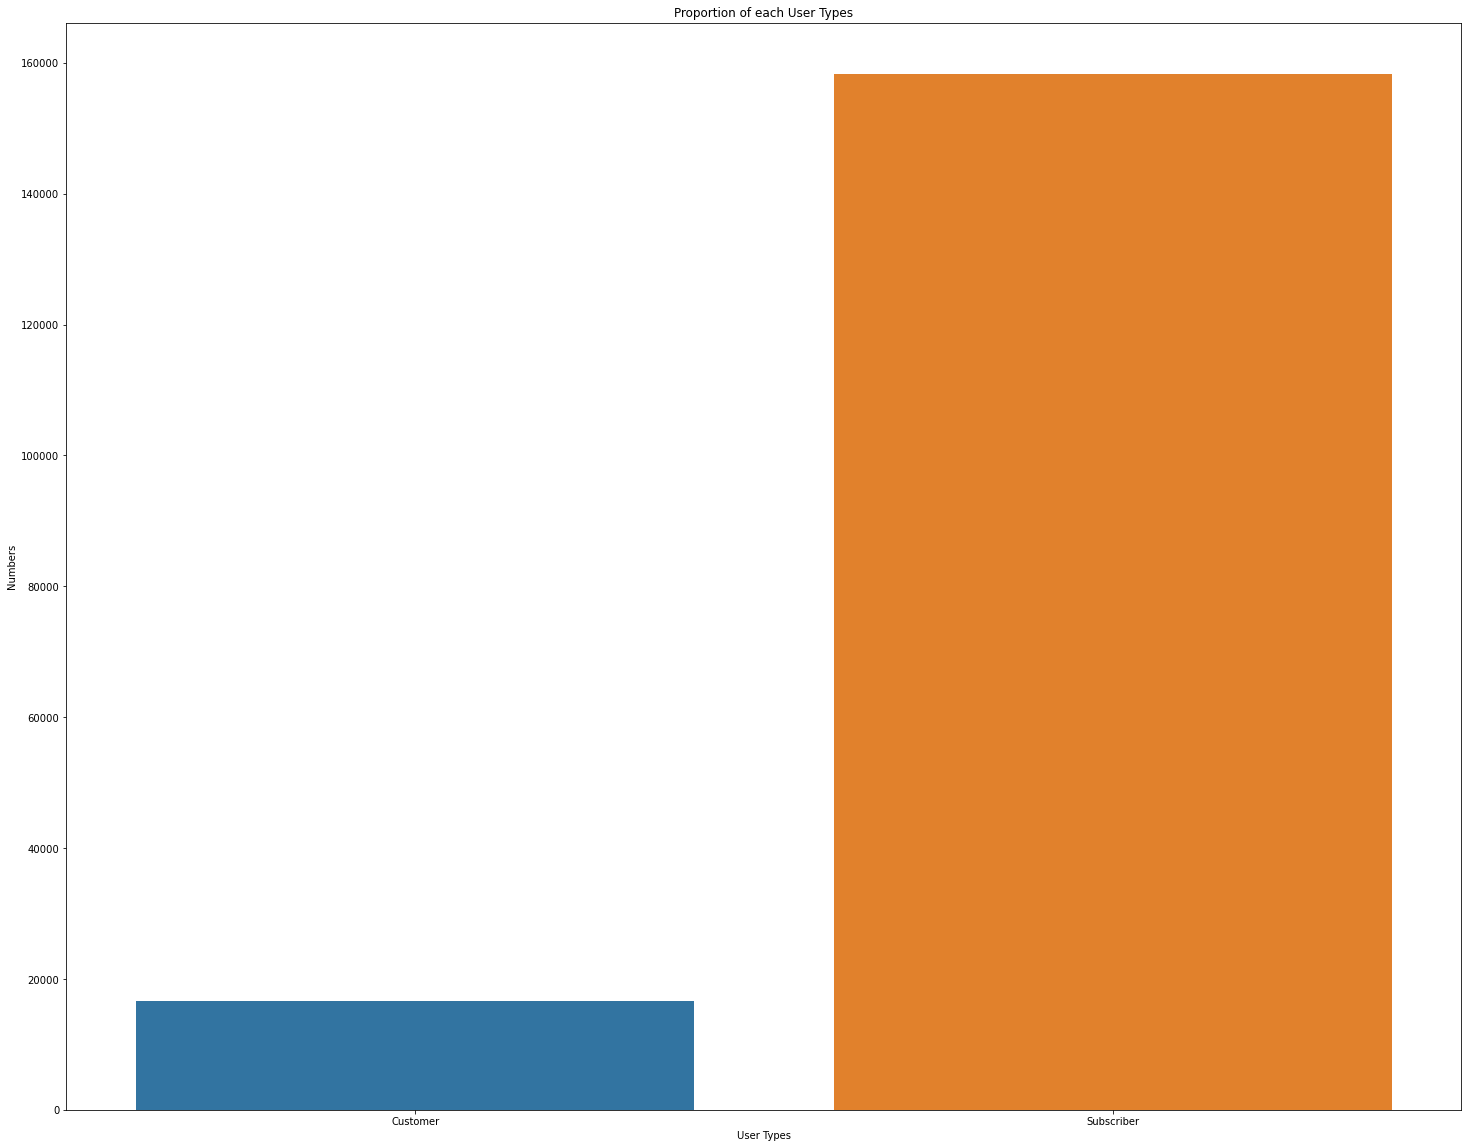

In [269]:
#The code to visualize user's types proportion. 

plt.figure(figsize=[25, 20])

sb.countplot(data = fordgobike_new, x='user_type')

plt.title("Proportion of each User Types")
plt.ylabel("Numbers")
plt.xlabel('User Types');

**This Bike Trip service has more subscribers than customers**

### Exploration 5- How user's ages are distributed ?

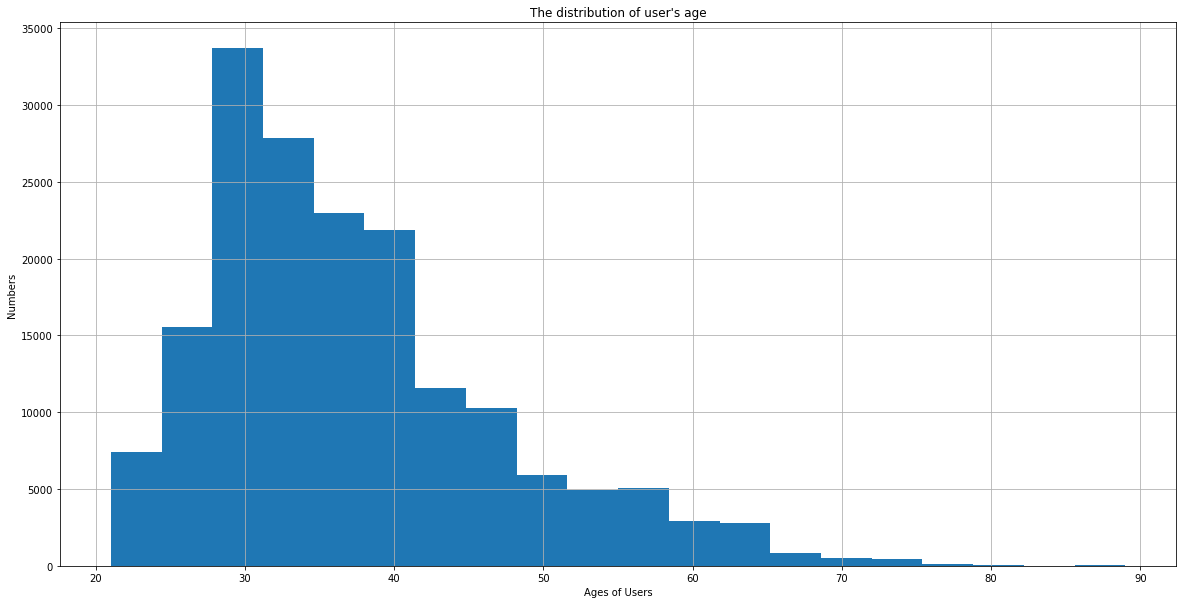

In [268]:
#This code will show the distributions of user's ages

plt.figure(figsize = [20,10])

fordgobike_new['age'].hist(bins= 20);

plt.xlabel('Ages of Users')
plt.ylabel('Numbers')
plt.title("The distribution of user's age")
plt.show()

**With this visualization, we can see a very important information : age of users of the bike trip service. We can notice that people who use most the service are young people, age between 22 and 42 years old.**

### Exploration 6- How member's genders are spread ?

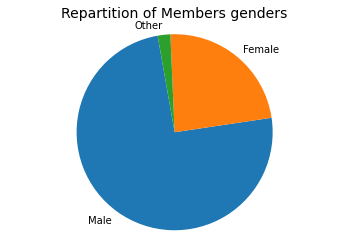

In [242]:
#Code to visualize the spread of member's genders

num_gen = fordgobike_new['member_gender'].value_counts()

plt.pie(num_gen, labels = num_gen.index, startangle = 100);
plt.axis('equal');
plt.title('Repartition of Members genders', fontsize=14);

**Male users come first, secondly we have female users and other users at the end.**

### Exploration 7- What is the spread for bike share for all trips?

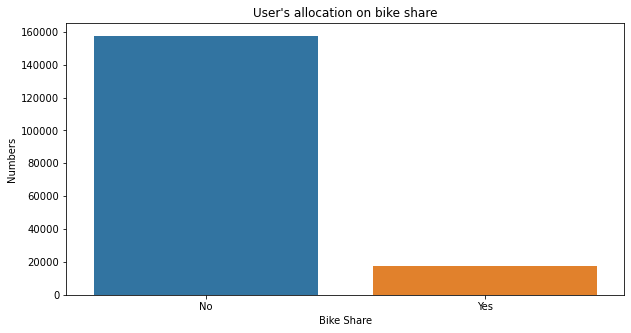

In [267]:
#The code is to visualize the allocation for bike share
plt.figure(figsize = (10,5))

plot = sb.countplot(data=fordgobike_new, x='bike_share_for_all_trip')

plt.xlabel('Bike Share')
plt.ylabel('Numbers')
plt.title("User's allocation on bike share")

plt.show()

**We can see with this visualization that most users don't share the bike.**

### Exploration  8 - How the week days are used ? 

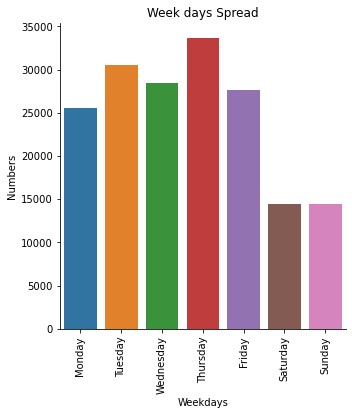

In [316]:
# This code is to visualize for the week days where the bikes are used.

fordgobike_new['start_time_weekday'] = fordgobike_new['start_time'].dt.strftime('%A')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot = sb.catplot(data=fordgobike_new, x='start_time_weekday', kind='count', order = weekday)

plt.xlabel('Weekdays')

plt.ylabel('Numbers')

plt.title("Week days Spread")

plot.set_xticklabels(rotation=90);

**Thursday is the day where we have the most usage. After that, we have Tuesday, Wednesday, Friday, Monday, Saturday, Sunday.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My first variable of interest is duration_sec. I had a visualization problem with it. The things were very confused. So, I have to transform the duration of the trips in seconds into minutes. This gave me a clear and useful visualization. 
My second variable of interest was User type. This variable has not unsual points. The exploration showed clearly that there were more suscribers than customers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to calculate ages of users based on their birthday date. I added this new column, age, to facilitate the work and give useful data for the marketing team. Secondly, when I did the age's distributions, I noticed that there were outliners values and I had ages which go to 140 years old. These kind of values can not help to better understand the dataset. To correct that, I had to clear the data to limit ages of people to 90 years old. It gave a better visualization. 

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my
data.

### Exploration 9- How long is the duration of the trip for each user type ?

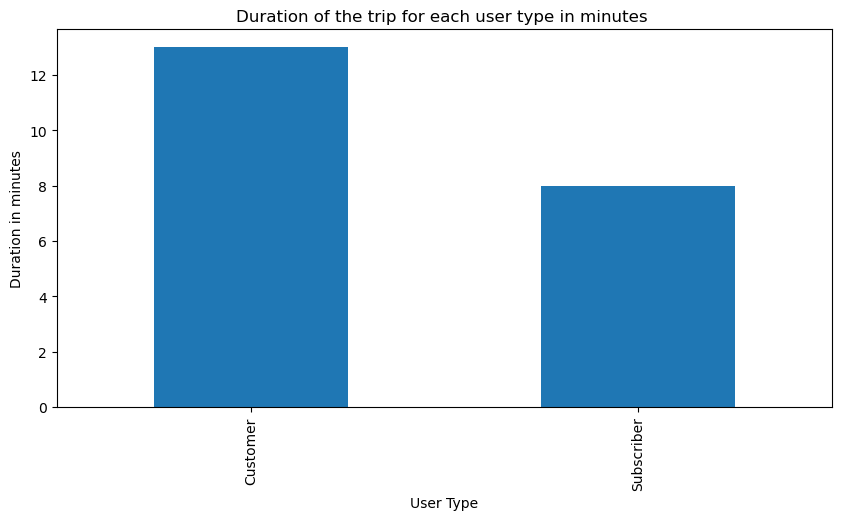

In [247]:
#Code to visualize the duration for each user type

plt.figure(figsize = (10,5), dpi = 100)

fordgobike_new.groupby('user_type')['duration_min'].median().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('User Type')

plt.ylabel('Duration in minutes')


plt.title("Duration of the trip for each user type in minutes ")

plt.show()

**With this visualisation, we can see my two features of interest. The visual shows that Customers have more duration in minutes than suscribers.**

### Exploration 10- What is the relation between the age and member gender ?

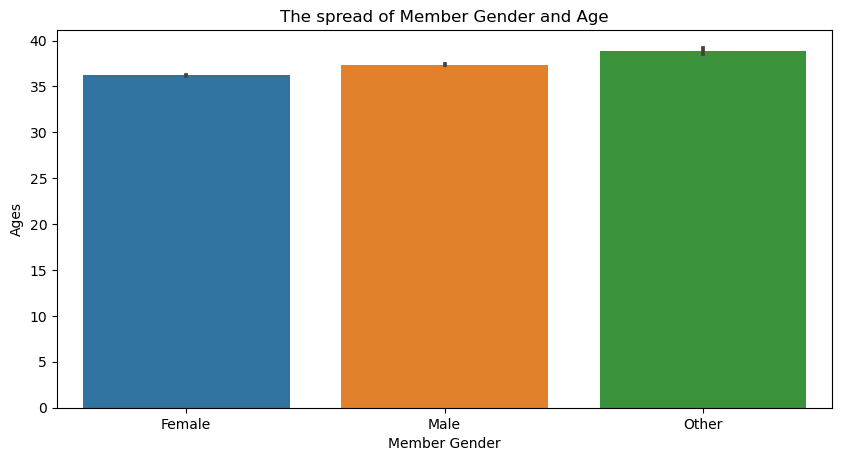

In [249]:
#Code to visualize the relation between the age of members and their genders

plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = fordgobike_new, x = "member_gender", y = "age")

plt.xlabel('Member Gender')

plt.ylabel('Ages')


plt.title("The spread of Member Gender and Age")

plt.show()

**The age average of other gender is more than male gender and female gender.** 

### Exploration 11- How long is the duration of a bike trip for each gender ?

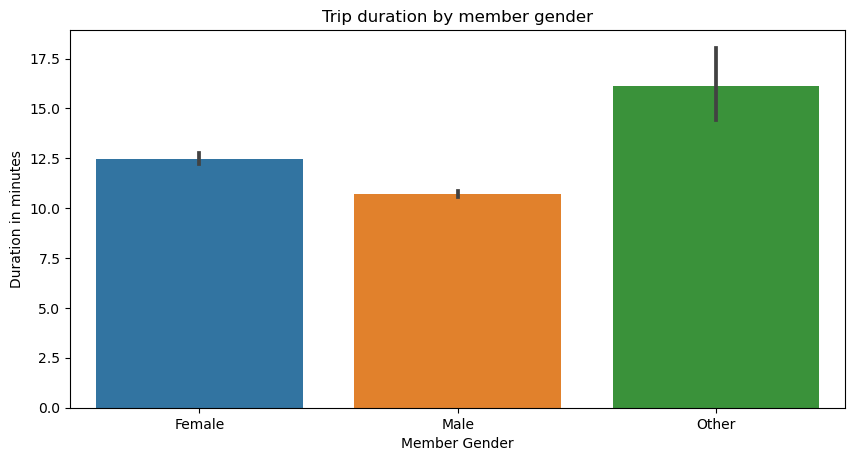

In [260]:
#Code to visualize the duration for each gender

plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = fordgobike_new, x = "member_gender", y = "duration_min")

plt.xlabel('Member Gender')

plt.ylabel('Duration in minutes')


plt.title("Trip duration by member gender")

plt.show()

**Males service usage duration is less than females usage which is less than other gender duration.**

### Exploration 12- How many member genders have we by user type ? 

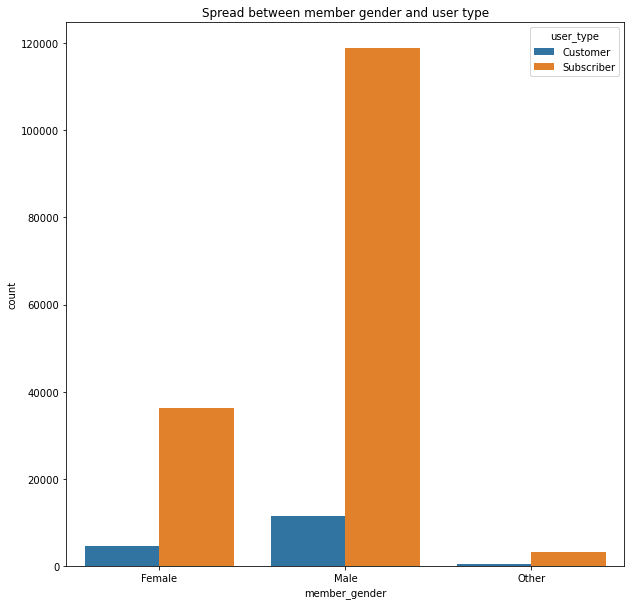

In [275]:
##Code to visualize the relation between member gender and user type

plt.figure(figsize = [10, 10]);

sb.countplot(data = fordgobike_new, x = 'member_gender', hue = 'user_type');

plt.title('Spread between member gender and user type');

**This visualization is very interesting. It showed that for every member gender, there are more suscribers than customers.**

### Exploration 13-  What is the relation between user age and duration ?

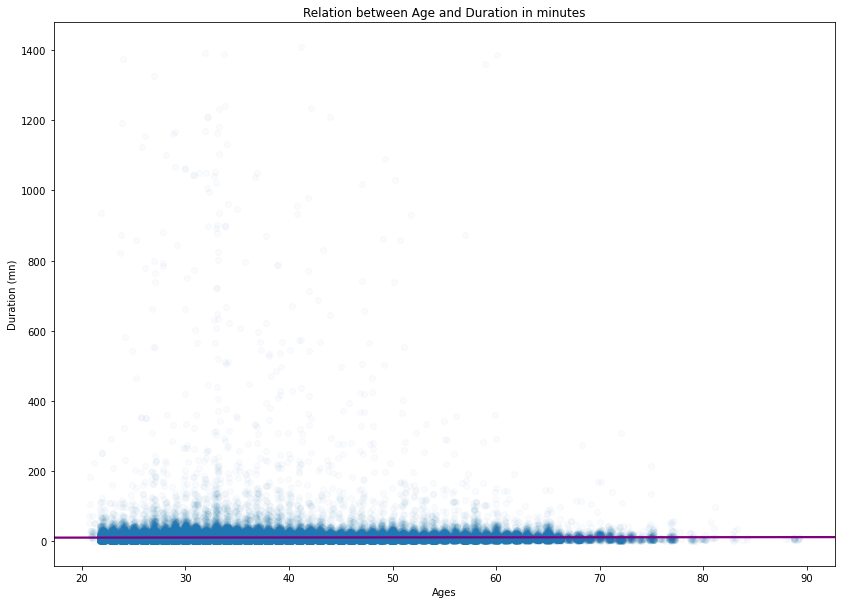

In [345]:
#code to visualize the relation between user age and duration
plt.figure(figsize=(14,10))
sb.regplot(data=fordgobike_new, y='duration_min', x='age', x_jitter=0.3, scatter_kws={'alpha':1/40}, 
           truncate=False, line_kws={"color": "purple"});
plt.xlabel('Ages')
plt.ylabel('Duration (mn)')
plt.title("Relation between Age and Duration in minutes");


**We can see on this visualization that people who are between approximately 20 and 50 years use more the riding bike.** 

### Exploration 14-  What is the relation between Age and User type ?

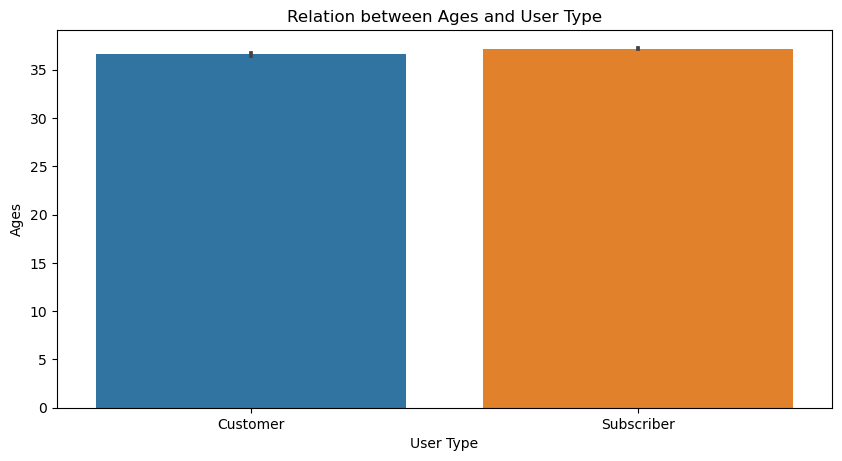

In [258]:
#Code to visualize the relation between the age and the user type

plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = fordgobike_new, x = "user_type", y = "age")

plt.xlabel('User Type')

plt.ylabel('Ages')

plt.title("Relation between Ages and User Type")

plt.show()

**The visualization shows that the distribution is approximately the same thing between ages of customer and ages of suscriber**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My investigation showed me interesting things. One of this interesting discovery is that Customers are the people who have more duration in minutes for the service of bike trip even though we showed in Univariate exploration that there are more suscribers than customers. It is an important  marketing data which can be used by the service in order to know where they will put more efforts.
> For the duration, we have also noticed that females have more duration than the males. 

>The average age is approximately the same between customers and subscribers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The average age between male and female is approximately the same. Other gender average age is a little more than for the two others. 

## Multivariate Exploration

> I will create plots of three or more variables to investigate my data even
further.

### Exploration 15-  What is the relation between user_type,  the duration in minutes and member_gender ? 

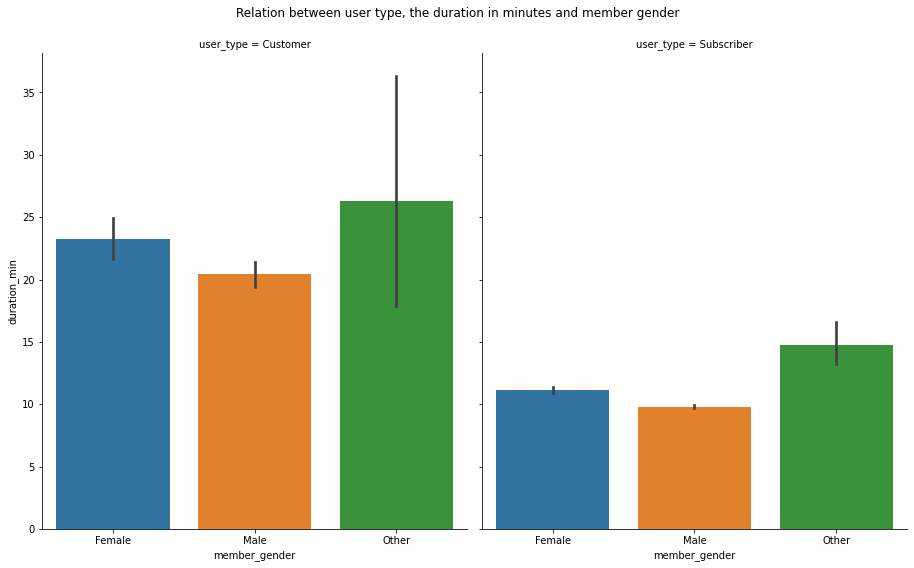

In [347]:
#Code to know the relation between user_type, the duration in minutes and member_gender

sb.catplot(x = "member_gender", y = "duration_min",
                col = "user_type",
                data = fordgobike_new, kind = "bar",
                height=8, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle("Relation between user type, the duration in minutes and member gender");


**We can see on the visualization that for the customers, Females have more duration in minutes than Males. The average duration of other genders are up more than the two others. For the subscribers the number is less but it is the same observation.**

### Exploration 16-  What is the distribution between start_time_weekday, duration in minutes and the user_type.

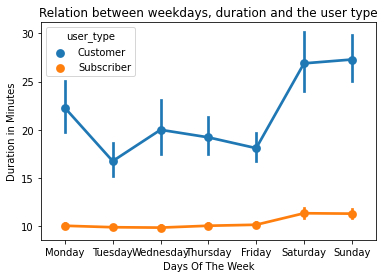

In [329]:
#Code to explore distribution between start_time_weekday, duration in minutes and the user_type
sb.pointplot(data=fordgobike_new, x='start_time_weekday', y='duration_min', hue='user_type', order = weekday)
plt.xlabel('Days Of The Week')
plt.ylabel('Duration in Minutes')
plt.title("Relation between weekdays, duration and the user type");

**We can see on this visualization that subscribers take less time every days of the week, compared to the customers.**

### Exploration 17- What is the relation between start_time_weekday, duration in minutes and the member_gender.

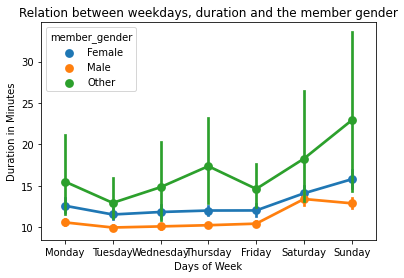

In [327]:
sb.pointplot(data=fordgobike_new, x='start_time_weekday', y='duration_min', hue='member_gender', order = weekday)
plt.xlabel('Days of Week')
plt.ylabel('Duration in Minutes')
plt.title("Relation between weekdays, duration and the member gender");

**This visualisation shows that male take less time than female every days of the week.**

 ### Exploration 18-  What is the correlation between the numeric values of the fordgobike dataset ?

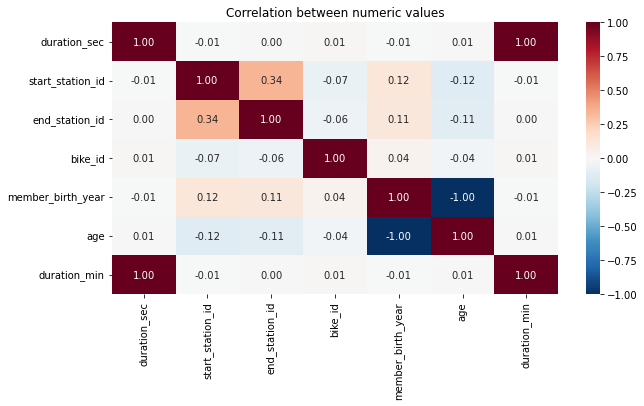

In [312]:
#Code to see correlation between the numeric values
num_val = ['duration_sec', 'start_station_id','end_station_id','bike_id', 'member_birth_year', 'age', 'duration_min']
plt.figure(figsize = (10,5))
sb.heatmap(fordgobike_new[num_val].corr(), annot = True, fmt = '.2f', cmap='RdBu_r', center = 0)
plt.title("Correlation between numeric values");

**There are lot of elements on this visualization. We can see the correlation between the numeric values.The correlations are not very significative. If we choose one of our interest feature, duration, we can see that it doesn't have any strong correlation with other features. We can also notice by example the value -1 between age and member_birth_year.**


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> With this exploration, I looked further on the interaction between the duration and other features like gender and user type. So, I noticed clearly that Females have more duration in minutes than Males. The average duration of other genders are up more than the two others. It is the same thing for suscribers and customers except that the numbers for customers are more than suscribers numbers. 
>I also noticed that my main feature has not strong correlation with other features. 

### Were there any interesting or surprising interactions between features?

> One of interesting visualization showed that people (male, female and other gender) take more time to ride during the week-end. 

## Conclusions
Before the exploration, I have done some wrangling. I have deleted and added some columns. These operations helped me during my visualizations. These are some findings from my exploration :

- The duration of most of the bike trips don't last more than 30 mn

- There are more males users for this service than females

- Thursday is the day of the week where the service is more used

- The duration of the trip for customer is more than subscribers duration

- Males service usage duration is less than females usage duration which is less than other gender duration.

- There are more subscribers than customers for every genders

- Customers and subscribers have approximately the same ages

- Subscribers take less time every days of the week, compared to the customers.

